In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [27]:
df = pd.read_csv(r"P:\Internship_Feynn\Project 2\Main Database\All Data variables.csv")
print(df.columns)
print(df.shape)
print(df.head(3))

Index(['State', 'Population 2011', 'Population Density', 'PCI2022-23',
       'EVSales2023', 'EVPer1000People', 'HighCapitaEV_Adoption',
       'LowCapitaEV_Adoption', 'ChargingStations', 'CSper1000kms',
       'SurfacedRoads', 'SurfacedRoadsPercent'],
      dtype='object')
(36, 12)
               State  Population 2011  Population Density  PCI2022-23  \
0     Andhra Pradesh         49386799                 308      219881   
1  Arunachal Pradesh          1383727                  17      199992   
2              Assam         31205576                 398      119308   

   EVSales2023  EVPer1000People  HighCapitaEV_Adoption  LowCapitaEV_Adoption  \
0        32850           0.6652                 0.6652                0.0000   
1            0           0.0000                 0.0000                0.0000   
2        60793           1.9481                 0.0000                1.9481   

   ChargingStations  CSper1000kms  SurfacedRoads  SurfacedRoadsPercent  
0               249      1.55

In [28]:
LE = LabelEncoder()
df['State'] = LE.fit_transform(df['State'])

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

In [29]:
pca = PCA(n_components=10)
DF_pca = pca.fit_transform(scaled_df)
explained_variance = np.round(pca.explained_variance_ratio_, 2)
components = np.round(pca.components_, 2)

print("Explained Variance Ratio (rounded to 1 decimal):")
print(explained_variance)

print("\nPCA Components (rounded to 1 decimal):")
print(components)

Explained Variance Ratio (rounded to 1 decimal):
[0.32 0.28 0.12 0.07 0.07 0.05 0.03 0.02 0.02 0.01]

PCA Components (rounded to 1 decimal):
[[ 0.21  0.44 -0.24 -0.1   0.4  -0.12 -0.2   0.24  0.44 -0.    0.39  0.3 ]
 [-0.02  0.13  0.31  0.4   0.23  0.49  0.48 -0.05  0.17  0.39  0.12  0.03]
 [ 0.42 -0.22 -0.34  0.42 -0.25 -0.12 -0.01 -0.31 -0.04  0.18 -0.02  0.52]
 [ 0.25 -0.11 -0.06 -0.04 -0.15  0.21 -0.09  0.81 -0.19  0.32 -0.22  0.06]
 [ 0.79  0.17  0.37  0.01  0.07 -0.09 -0.04 -0.12  0.04 -0.14 -0.21 -0.35]
 [ 0.09 -0.17  0.28  0.18 -0.1   0.19  0.1   0.24 -0.17 -0.69  0.4   0.28]
 [-0.21  0.25  0.17  0.24  0.3  -0.08 -0.09  0.06 -0.03 -0.24 -0.69  0.4 ]
 [-0.12 -0.03  0.67  0.02 -0.12 -0.38 -0.36  0.01 -0.07  0.38  0.24  0.22]
 [-0.16 -0.09 -0.1   0.69 -0.09 -0.19 -0.26  0.22  0.34 -0.1   0.03 -0.44]
 [-0.01  0.49 -0.18  0.28  0.11 -0.08 -0.06 -0.02 -0.74  0.06  0.22 -0.16]]


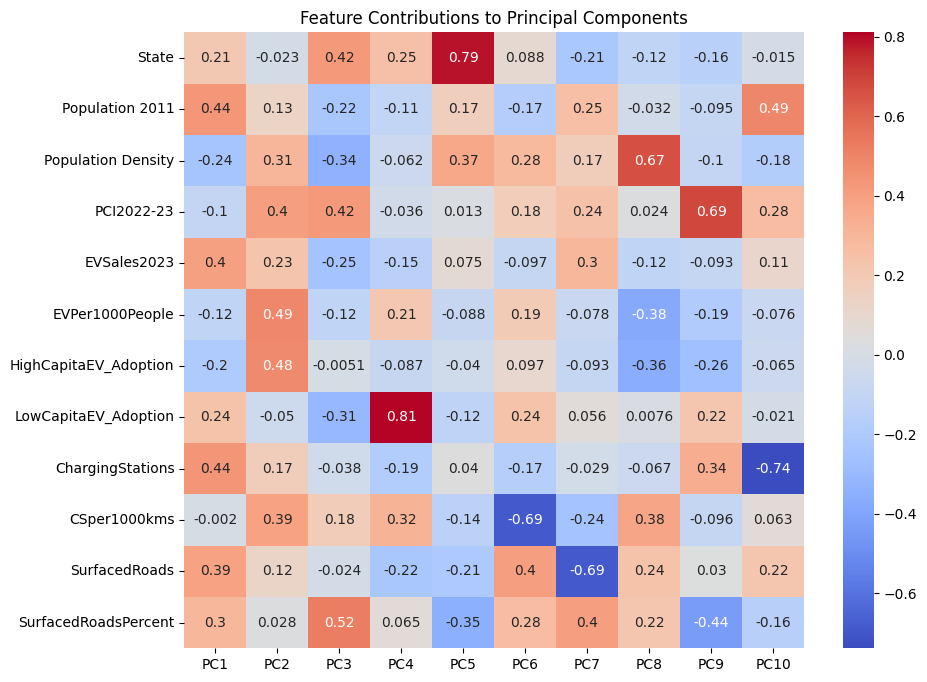

In [36]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(10)], index=df.columns)
plt.figure(figsize=(10, 8))

sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title("Feature Contributions to Principal Components")


plt.show() 

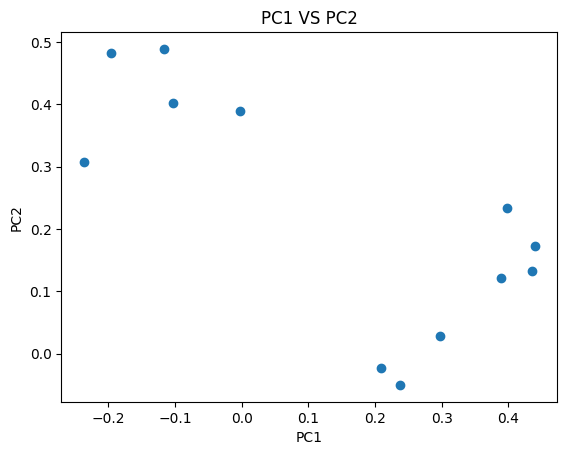

In [60]:
plt.scatter(loadings['PC1'], loadings['PC2'])

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PC1 VS PC2")

plt.show()

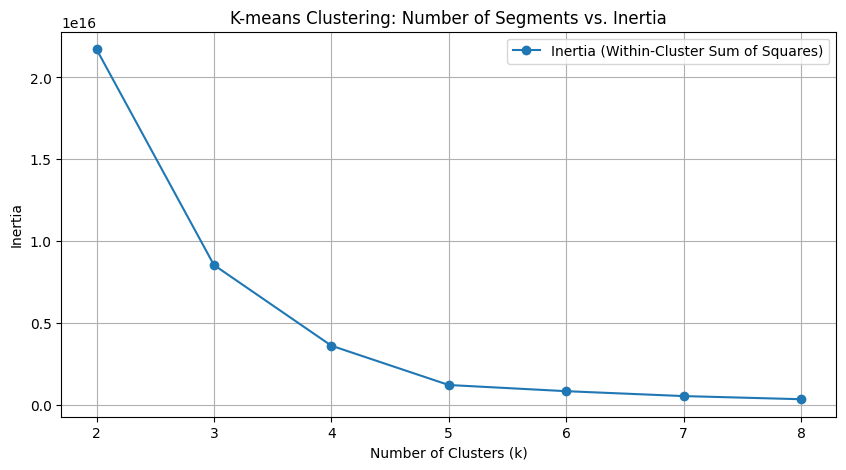

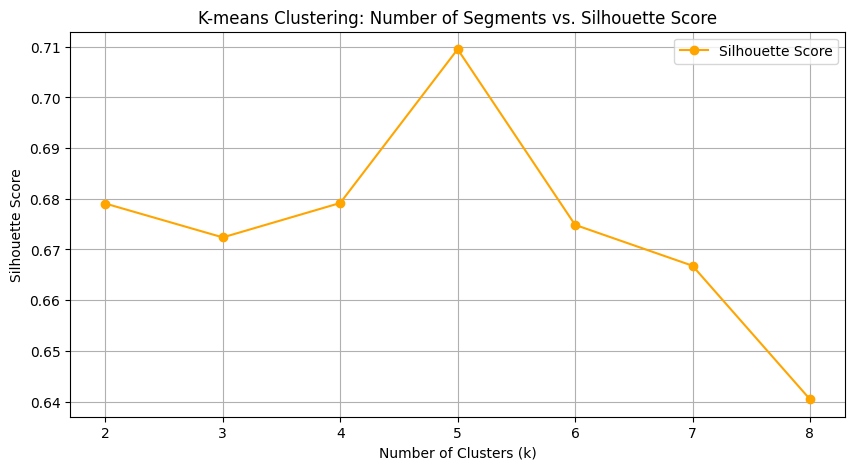

In [62]:
cluster_range = range(2, 9)
inertia = []
silhouette_scores = [] 

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_) 
    silhouette_scores.append(silhouette_score(df, kmeans.labels_)) 

plt.figure(figsize=(10, 5))
plt.plot(cluster_range, inertia, marker='o', label='Inertia (Within-Cluster Sum of Squares)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('K-means Clustering: Number of Segments vs. Inertia')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', color='orange', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('K-means Clustering: Number of Segments vs. Silhouette Score')
plt.grid(True)
plt.legend()
plt.show()